In [1]:
import pandas as pd
import seaborn as sns
validation = pd.read_csv("docker/workspace/results/base.csv")
validation["plausible"] = validation["compile"] & validation["dev_test"] & validation["reg_test"]
validation

,pid,vid,sid,mode,compile,dev_test,reg_test,plausible
0,Chart,10,1,normal,1,1,1,1
1,Chart,10,2,normal,1,1,1,1
2,Chart,10,3,normal,1,1,1,1
3,Chart,10,4,normal,1,1,1,1
4,Chart,10,5,normal,1,1,1,1
...,...,...,...,...,...,...,...,...
1930,Lang,9,1,mem,0,0,0,0
1931,Lang,9,2,mem,0,0,0,0
1932,Lang,9,3,mem,0,0,0,0
1933,Lang,9,4,mem,0,0,0,0


In [18]:
import numpy as np

dev_reduction
mode
mem       0.659969
normal    0.456269
time      0.345090
Name: dev_reduction, dtype: float64
reg_reduction
mode
mem       0.407835
normal    0.384687
time      0.412382
Name: reg_reduction, dtype: float64
all_reduction
mode
mem       0.456156
normal    0.499464
time      0.394728
Name: all_reduction, dtype: float64


<Axes: xlabel='mode', ylabel='all_reduction'>

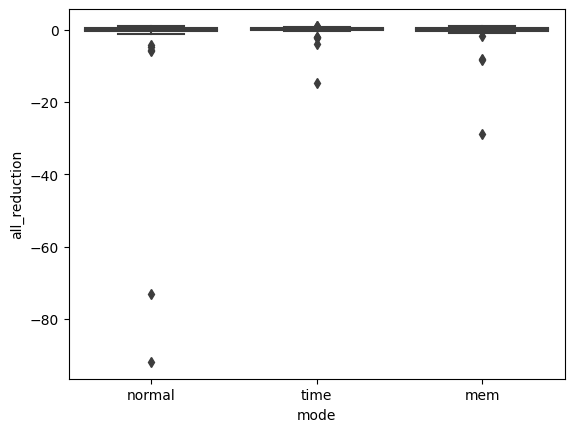

In [14]:

mem = pd.read_csv("docker/workspace/results/mem.csv")

mem = mem.join(validation.set_index(["pid", "vid", "sid", "mode"])["plausible"], on=["pid", "vid", "sid", "mode"])
mem = mem[mem.plausible == 1]
mem = mem[mem.fixed_dev_mem != 0]
# mem = mem[mem.llm_dev_mem != 0]
mem = mem[mem.fixed_reg_mem != 0]
# mem = mem[mem.llm_reg_mem != 0]

mem["fixed_mem"] = mem["fixed_dev_mem"] + mem["fixed_reg_mem"]
mem["llm_mem"] = mem["llm_dev_mem"] + mem["llm_reg_mem"]


mem["dev_reduction"] = 1 - mem["llm_dev_mem"]/mem["fixed_dev_mem"]
mem["reg_reduction"] = 1 - mem["llm_reg_mem"]/mem["fixed_reg_mem"]
mem["all_reduction"] = 1 - mem["llm_mem"]/mem["fixed_mem"]

# mem["dev_reduction"] = mem["dev_reduction"].fillna(0)
# mem["reg_reduction"] = mem["reg_reduction"].fillna(0)
# mem["all_reduction"] = mem["all_reduction"].fillna(0)
# mem.replace([-np.inf], 1)


for col in ["dev_reduction", "reg_reduction", "all_reduction"]:
    print(col)
    print(mem.groupby(["pid", "vid", "mode"])[col].max().to_frame().reset_index().groupby("mode")[col].mean())

sns.boxplot(data=mem, y="all_reduction", x="mode")

In [12]:
time = pd.read_csv("docker/workspace/results/dev_time.csv")

time = time.join(validation.set_index(["pid", "vid", "sid", "mode"])["plausible"], on=["pid", "vid", "sid", "mode"])
time = time[time.plausible == 1]
time = time[time.fixed_dev_time != 0]

time["dev_reduction"] = 1 - time["llm_dev_time"]/time["fixed_dev_time"]

for col in ["dev_reduction"]:
    print(col)
    print(time.groupby(["pid", "vid", "mode"])[col].max().to_frame().reset_index().groupby("mode")[col].mean())

dev_reduction
mode
mem       0.135501
normal    0.151794
time      0.148473
Name: dev_reduction, dtype: float64


In [25]:
time = pd.read_csv("docker/workspace/results/time.csv")

time["fixed_time"] = time["fixed_dev_time"] + time["fixed_reg_time"]
time["llm_time"] = time["llm_dev_time"] + time["llm_reg_time"]

time["dev_reduction"] = 1 - time["llm_dev_time"]/time["fixed_dev_time"]
time["reg_reduction"] = 1 - time["llm_reg_time"]/time["fixed_reg_time"]
time["all_reduction"] = 1 - time["llm_time"]/time["fixed_time"]

for col in ["dev_reduction", "reg_reduction", "all_reduction"]:
    print(col)
    print(time.groupby(["pid", "vid", "mode"])[col].max().to_frame().reset_index().groupby("mode")[col].mean())

dev_reduction
mode
mem       0.028679
normal    0.031924
time      0.020983
Name: dev_reduction, dtype: float64
reg_reduction
mode
mem       0.029352
normal    0.030477
time      0.027888
Name: reg_reduction, dtype: float64
all_reduction
mode
mem       0.027159
normal    0.030004
time      0.026965
Name: all_reduction, dtype: float64
